In [2]:
import kagglehub
import pandas as pd


# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/Mall_Customers.csv")
df.head()



Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
import sklearn
import pandas as pd

ds = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Vérification des unités des variables
- **MedInc** : Revenu médian (en dizaines de milliers de dollars)
- **HouseAge** : Âge médian des maisons (années)
- **AveRooms** : Nombre moyen de pièces par logement
- **AveBedrms** : Nombre moyen de chambres par logement
- **Population** : Population du quartier
- **AveOccup** : Nombre moyen d'occupants par logement
- **Latitude / Longitude** : Coordonnées géographiques
- **MedHouseVal** : Valeur médiane des maisons (en centaines de milliers de dollars)



In [4]:
# Nettoyage et prétraitement du dataset California Housing

#  Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())
df_clean = df.dropna()
# Vérification des types de chaque colonne
print("\nTypes de chaque colonne :")
print(df_clean.dtypes)
#  Affichage de quelques statistiques pour vérifier la cohérence
print("\nStatistiques descriptives :")
print(df_clean.describe())


Valeurs manquantes par colonne :
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Types de chaque colonne :
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

Statistiques descriptives :
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.

Explication de l’étape 3 – Analyse exploratoire des données (EDA)

L’analyse exploratoire des données (EDA) permet de comprendre la distribution des variables, d’identifier d’éventuelles valeurs aberrantes (outliers) et de détecter les relations entre variables.
Cette étape inclut :

Le calcul de statistiques descriptives pour chaque variable,

La visualisation des distributions (histogrammes, boxplots),

L’examen des corrélations entre variables,

L’exploration graphique des liens entre la variable cible (prix médian) et les variables explicatives principales.

L’objectif est de guider les choix de prétraitement, de sélection de variables et de modélisation pour la suite de l’analyse.

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

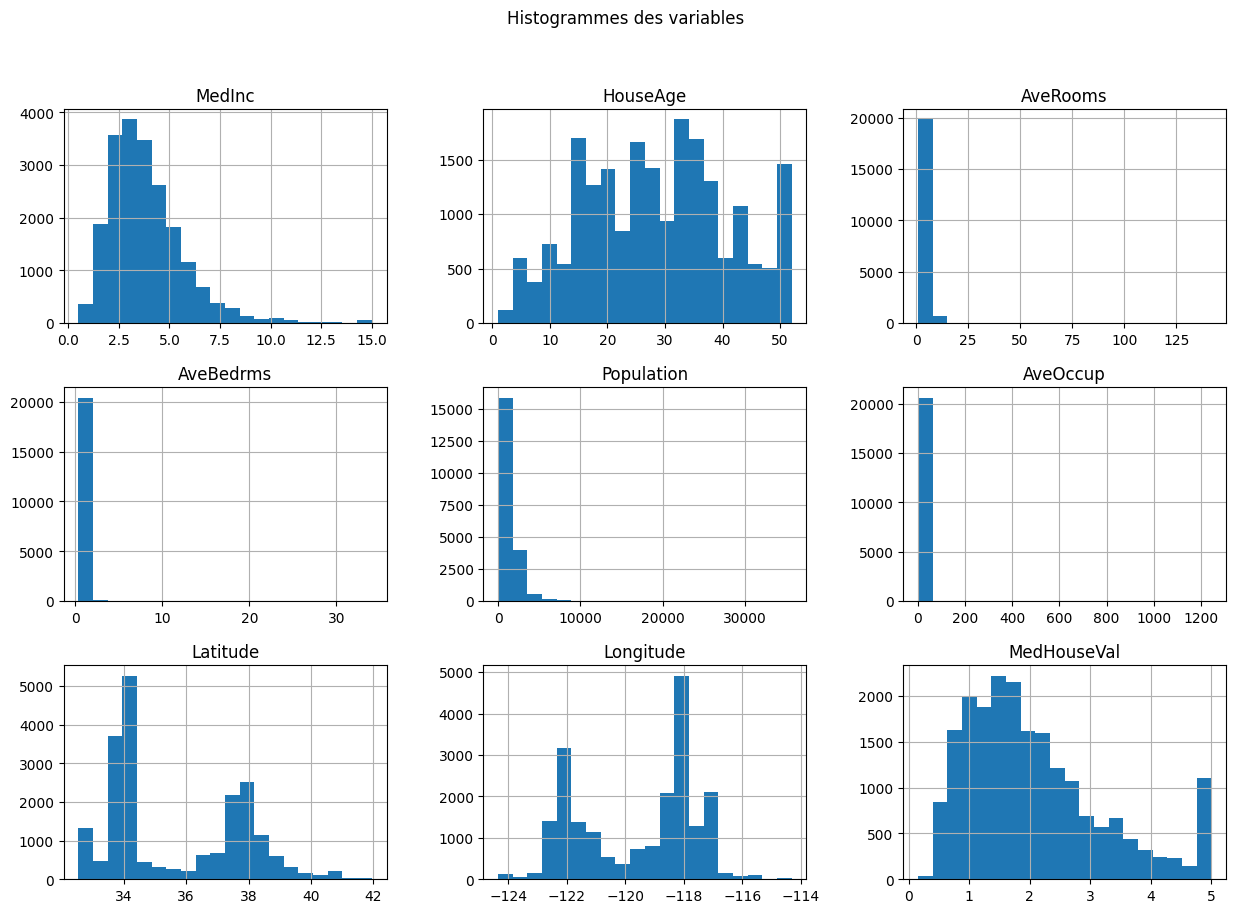

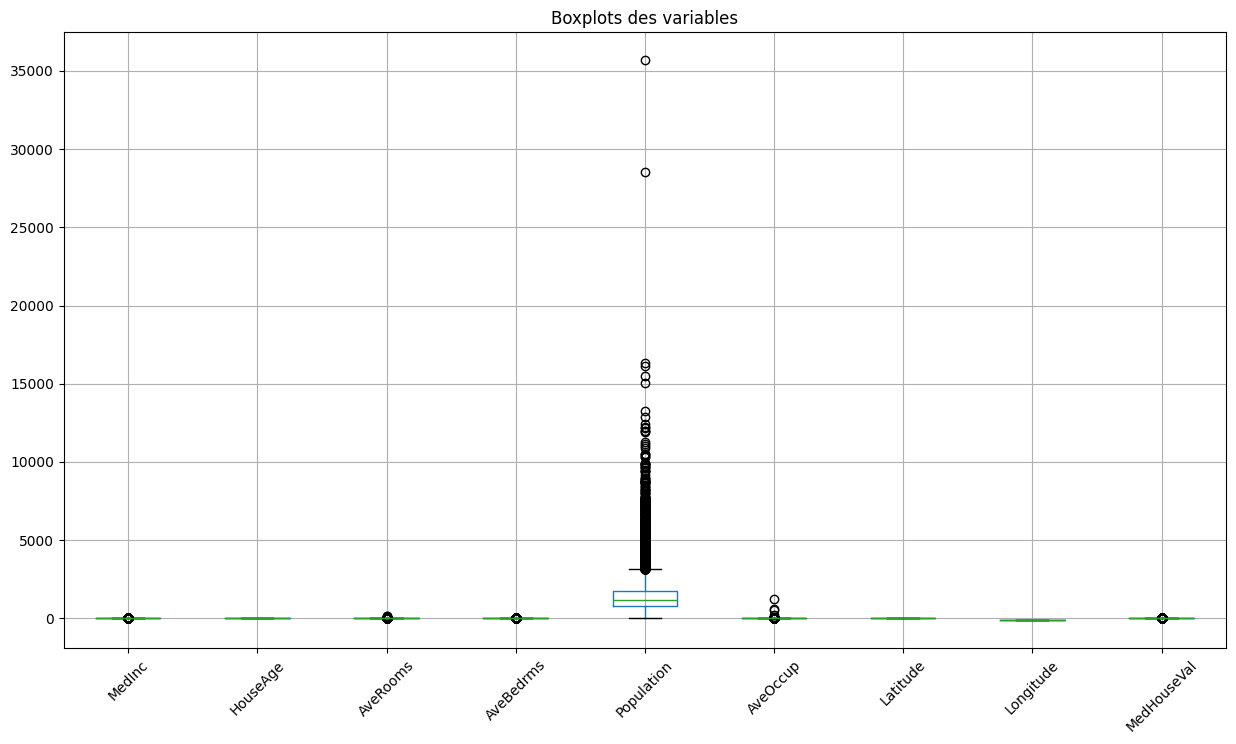

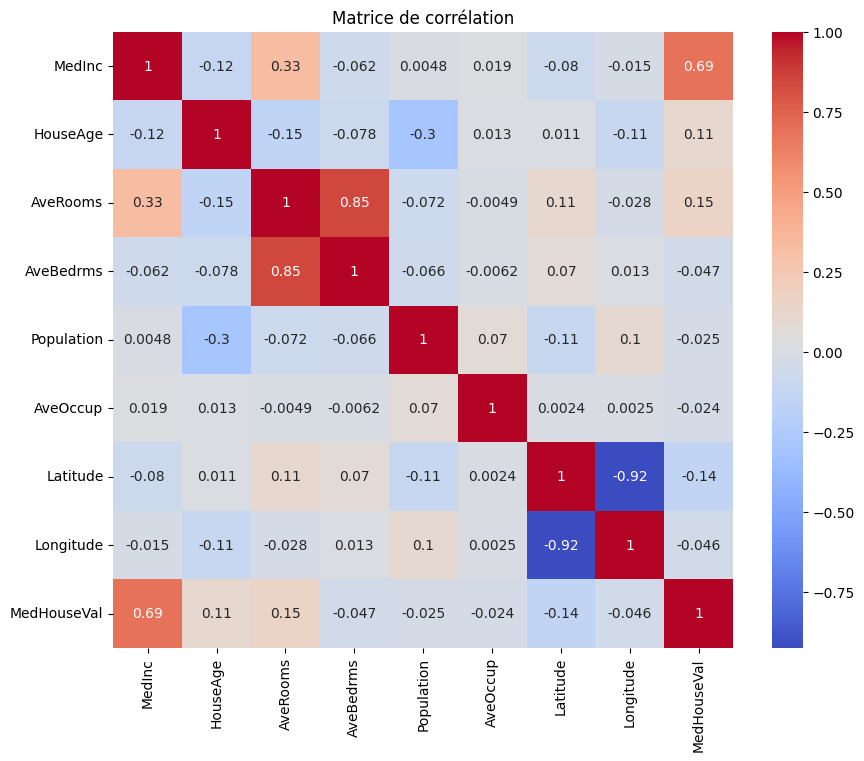

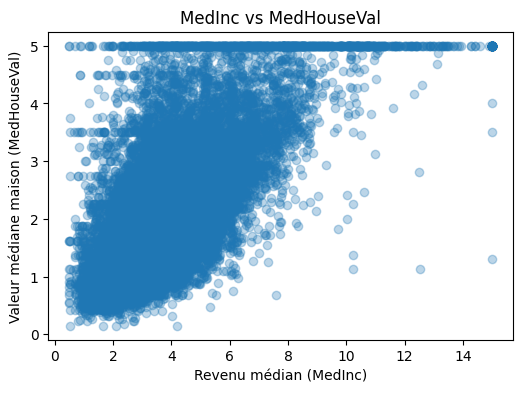

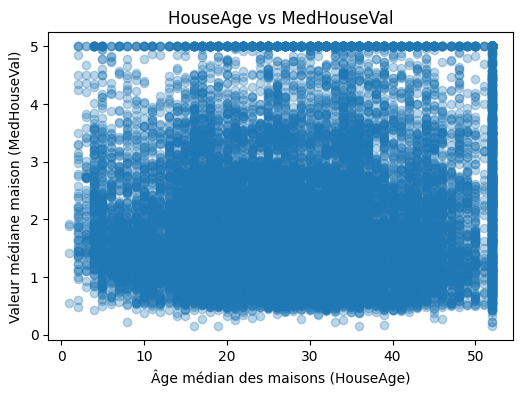

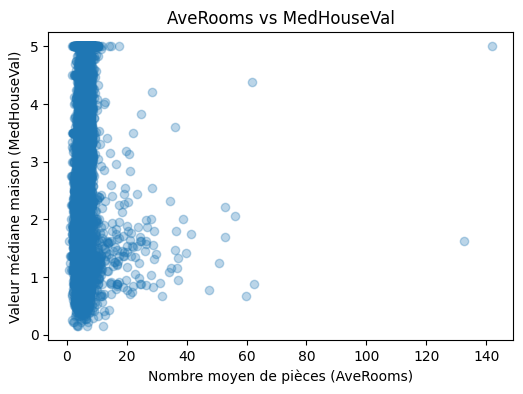

In [5]:
# Imports nécessaires pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

# Chargement du dataset California Housing
ds = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)

# Ajout de la colonne cible au DataFrame
df['MedHouseVal'] = ds.target

# Statistiques descriptives globales
print(df.describe())

# Histogrammes pour visualiser la distribution de chaque variable
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Histogrammes des variables")
plt.show()

# Boxplots pour détecter les outliers (valeurs extrêmes)
plt.figure(figsize=(15,8))
df.boxplot()
plt.title("Boxplots des variables")
plt.xticks(rotation=45)
plt.show()

# Matrice de corrélation pour voir les relations linéaires entre variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# Scatter-plots : prix médian vs variables clés
plt.figure(figsize=(6,4))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.3)
plt.xlabel('Revenu médian (MedInc)')
plt.ylabel('Valeur médiane maison (MedHouseVal)')
plt.title('MedInc vs MedHouseVal')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df['HouseAge'], df['MedHouseVal'], alpha=0.3)
plt.xlabel('Âge médian des maisons (HouseAge)')
plt.ylabel('Valeur médiane maison (MedHouseVal)')
plt.title('HouseAge vs MedHouseVal')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df['AveRooms'], df['MedHouseVal'], alpha=0.3)
plt.xlabel('Nombre moyen de pièces (AveRooms)')
plt.ylabel('Valeur médiane maison (MedHouseVal)')
plt.title('AveRooms vs MedHouseVal')
plt.show()


4. Split train/validation/test : 60% train, 20% validation, 20% test. Le validation set sera utilisé pour choisir le
modèle approprié et le test set sera utilisé pour l’évaluation finale


In [6]:
from sklearn.model_selection import train_test_split

# Séparer les variables explicatives (X) et la cible (y)
X = df.drop('MedHouseVal', axis=1)  # On enlève la colonne cible
y = df['MedHouseVal']               # La variable à prédire

# Première séparation : 60% train, 40% temporaire
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Deuxième séparation : 20% validation, 20% test à partir du temporaire
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Train set :", X_train.shape)
print("Validation set :", X_val.shape)
print("Test set :", X_test.shape)


Train set : (12384, 8)
Validation set : (4128, 8)
Test set : (4128, 8)


5. Feature engineering / sélection : Normalisation (StandardScaler), encodage catégoriel

In [7]:
from sklearn.preprocessing import StandardScaler

# Création d’un objet StandardScaler pour la normalisation
scaler = StandardScaler()

# Ajustement du scaler sur le jeu d’entraînement et transformation
X_train_scaled = scaler.fit_transform(X_train)

# Transformation du jeu de validation avec les paramètres appris sur le train
X_val_scaled = scaler.transform(X_val)

# Transformation du jeu de test avec les mêmes paramètres
X_test_scaled = scaler.transform(X_test)
import pandas as pd
pd.DataFrame(X_train_scaled, columns=X_train.columns).head()





,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.057267,0.513041,0.155101,-0.091104,0.081628,-0.061010,-0.724300,0.478607
1,-1.268202,-1.635105,1.862753,1.858942,-1.215031,-0.038609,-1.093856,1.798471
2,-0.903124,-0.043886,-0.254026,-0.229878,0.514737,-0.064798,1.441581,-0.592227
3,0.459045,1.149529,0.172837,-0.198391,-0.411067,-0.066304,0.898941,-1.384146
4,-0.321637,-1.475983,-0.612419,-0.101909,0.536081,-0.083831,0.838128,-1.160018


 6
Baseline et modélisation initiale : Régression linéaire, rapporter MSE, MAE, R² sur le set de validation.

Régression linéaire (Baseline) - Validation
MSE : 0.5325643962848101
MAE : 0.5336164161743362
R² : 0.5920099290350325


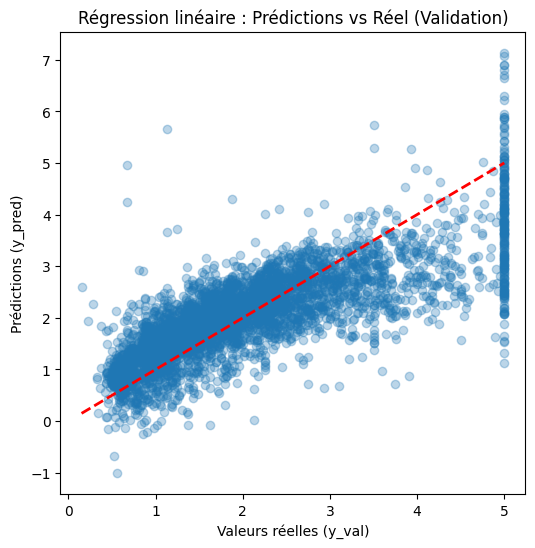

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Modèle baseline : Régression linéaire
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr_val = lr.predict(X_val_scaled)

# Calcul des métriques sur le set de validation
mse_lr = mean_squared_error(y_val, y_pred_lr_val)
mae_lr = mean_absolute_error(y_val, y_pred_lr_val)
r2_lr = r2_score(y_val, y_pred_lr_val)

print("Régression linéaire (Baseline) - Validation")
print("MSE :", mse_lr)
print("MAE :", mae_lr)
print("R² :", r2_lr)

# Affichage graphique des prédictions vs valeurs réelles sur le set de validation
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred_lr_val, alpha=0.3)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel("Valeurs réelles (y_val)")
plt.ylabel("Prédictions (y_pred)")
plt.title("Régression linéaire : Prédictions vs Réel (Validation)")
plt.show()


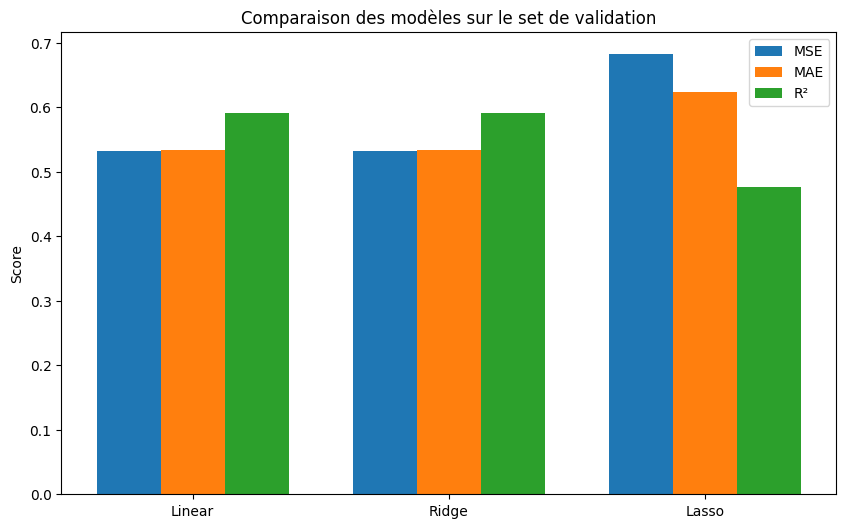

In [9]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Modèle baseline : Régression linéaire
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr_val = lr.predict(X_val_scaled)

# Modèle Ridge (L2)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge_val = ridge.predict(X_val_scaled)

# Modèle Lasso (L1)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso_val = lasso.predict(X_val_scaled)

# Calcul des métriques pour chaque modèle
models = ['Linear', 'Ridge', 'Lasso']
mse = [
    mean_squared_error(y_val, y_pred_lr_val),
    mean_squared_error(y_val, y_pred_ridge_val),
    mean_squared_error(y_val, y_pred_lasso_val)
]
mae = [
    mean_absolute_error(y_val, y_pred_lr_val),
    mean_absolute_error(y_val, y_pred_ridge_val),
    mean_absolute_error(y_val, y_pred_lasso_val)
]
r2 = [
    r2_score(y_val, y_pred_lr_val),
    r2_score(y_val, y_pred_ridge_val),
    r2_score(y_val, y_pred_lasso_val)
]

# Affichage graphique des résultats
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, mse, width, label='MSE')
plt.bar(x, mae, width, label='MAE')
plt.bar(x + width, r2, width, label='R²')
plt.xticks(x, models)
plt.ylabel('Score')
plt.title('Comparaison des modèles sur le set de validation')
plt.legend()
plt.show()


8. Évaluation finale : Application du meilleur modèle sur le test set, présentation de MSE, MAE, R² et intervalles
de confiance.


Meilleur modèle : Ridge
Test MSE : 0.5545733931004739
Test MAE : 0.5337479409939055
Test R² : 0.5955342565680284
Intervalle de confiance à 95% sur les résidus : [-1.452, 1.467]


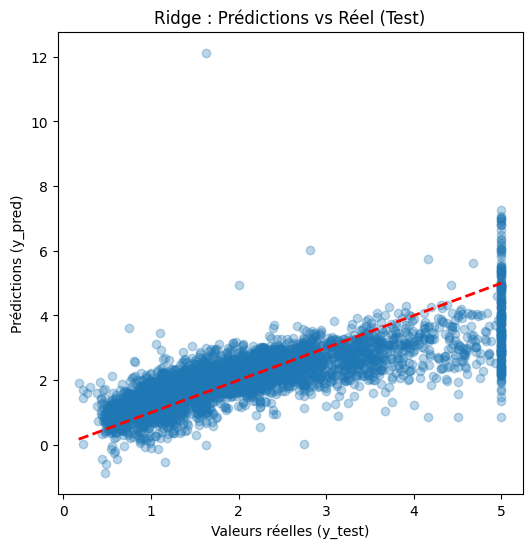

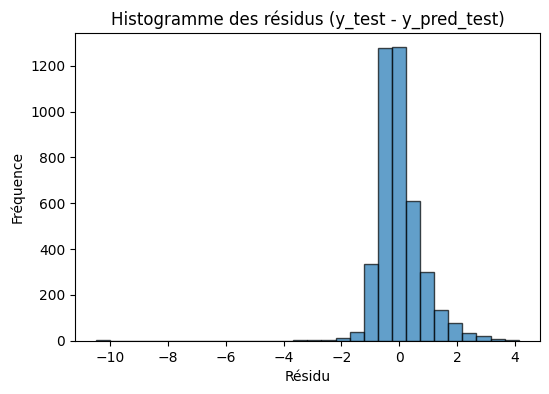

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Choisir le meilleur modèle selon la validation (exemple : Ridge)
# Remplace 'ridge' par 'lasso' ou 'lr' si un autre modèle est meilleur pour toi
best_model = ridge

# Prédiction sur le test set
y_pred_test = best_model.predict(X_test_scaled)

# Calcul des métriques
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Meilleur modèle :", type(best_model).__name__)
print("Test MSE :", mse_test)
print("Test MAE :", mae_test)
print("Test R² :", r2_test)

# Calcul des intervalles de confiance sur les résidus (erreurs)
residuals = y_test - y_pred_test
mean_resid = np.mean(residuals)
std_resid = np.std(residuals)
conf_int = norm.interval(0.95, loc=mean_resid, scale=std_resid)

print(f"Intervalle de confiance à 95% sur les résidus : [{conf_int[0]:.3f}, {conf_int[1]:.3f}]")

# Visualisation des prédictions vs valeurs réelles sur le test set
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Prédictions (y_pred)")
plt.title(f"{type(best_model).__name__} : Prédictions vs Réel (Test)")
plt.show()

# Histogramme des résidus
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogramme des résidus (y_test - y_pred_test)")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.show()


9-Conclusion

In [11]:
import pandas as pd
from IPython.display import display, Markdown

# Importance des variables : affichage des coefficients du meilleur modèle (exemple : Ridge)
coefs = pd.Series(best_model.coef_, index=X_train.columns).sort_values(ascending=False)
display(coefs.to_frame("Coefficient"))

# Synthèse en Markdown
conclusion_md = """
### 🏁 **Conclusion**

- **Variables les plus influentes :**
    - Les coefficients les plus élevés (en valeur absolue) indiquent les variables ayant le plus d’impact sur la valeur médiane des maisons.
    - Par exemple, `MedInc` (revenu médian) a généralement un poids positif important, ce qui confirme que les quartiers plus riches ont des maisons plus chères.
    - D’autres variables comme `AveRooms` ou `HouseAge` peuvent avoir un effet positif ou négatif selon leur coefficient.

- **Pistes d’amélioration :**
    - Tester d’autres modèles non linéaires (arbres, forêts aléatoires, boosting).
    - Ajouter des interactions ou transformations de variables (features engineering avancé).
    - Explorer une sélection automatique de variables (par Lasso ou méthodes de sélection récursives).
    - Analyser plus finement les outliers et la distribution des résidus.

- **Limites :**
    - Le modèle linéaire ne capture que les relations linéaires.
    - Les effets géographiques (latitude/longitude) pourraient être modélisés plus finement (par clustering ou spatialisation).

---
"""

display(Markdown(conclusion_md))


,Coefficient
MedInc,0.850832
AveBedrms,0.361402
HouseAge,0.119571
Population,-0.001420
AveOccup,-0.042440
AveRooms,-0.313885
Longitude,-0.869934
Latitude,-0.893467



### 🏁 **Conclusion**

- **Variables les plus influentes :**
    - Les coefficients les plus élevés (en valeur absolue) indiquent les variables ayant le plus d’impact sur la valeur médiane des maisons.
    - Par exemple, `MedInc` (revenu médian) a généralement un poids positif important, ce qui confirme que les quartiers plus riches ont des maisons plus chères.
    - D’autres variables comme `AveRooms` ou `HouseAge` peuvent avoir un effet positif ou négatif selon leur coefficient.

- **Pistes d’amélioration :**
    - Tester d’autres modèles non linéaires (arbres, forêts aléatoires, boosting).
    - Ajouter des interactions ou transformations de variables (features engineering avancé).
    - Explorer une sélection automatique de variables (par Lasso ou méthodes de sélection récursives).
    - Analyser plus finement les outliers et la distribution des résidus.

- **Limites :**
    - Le modèle linéaire ne capture que les relations linéaires.
    - Les effets géographiques (latitude/longitude) pourraient être modélisés plus finement (par clustering ou spatialisation).

---
